# 経営情報各論BⅡ：６．機械学習(3)　分類とグループ化
2023/10/24 14:40-16:10

本日の講義では，教師あり学習の（回帰および）分類と教師なし学習の分類について学びます．具体的には，（教師あり学習の回帰では，線形単回帰分析と線形重回帰分析，）教師ありの学習の分類では，線形判別分析，決定木，ランダムフォレストによる分類とその結果の評価指標，教師なしの学習では，階層的クラスター分析，対応分析によるグループ化を学びます．教師ある学習（回帰）については、前期の回帰で一度説明しましたが、もう一度簡単に復習したいと思います。

## 6.1 機械学習
- 機械学習とは，人間が持つ学習能力をコンピュータに持たせることを目指す人工知能の研究分野です．
- コンピュータにデータを解析させることで，データの背後に潜むパターンを発見（学習）させる技術です．
- 発見したパターンを使って，新たなデータが予測できます．
- これにより，手作業では扱えないような大量なデータを高速で処理でき，パターンを発見するための十分なデータが用意できれば，人間が予測するよりも高い精度で予測を行うことができます．
- 音声認識，手書き文字認識，顔画像認識，X線画像・CT画像からの病気の診断，指紋・静脈・虹彩などによる本人識別など，様々な分野で用いられています．
- 自然言語処理のアプリケーションでも，大規模な言語データ（コーパス）が利用可能となっているため，統計的機械翻訳などに広く活用されています．
### 教師あり学習と教師なし学習
- 機械学習の手法は，教師あり学習と教師なし学習の２つに大きく分けられます．（ほかにも，半教師あり学習や強化学習などの手法もあります）
- 教師とは，正解データのこと．例えば，スパムメールを分類する際，パターンを発見するためのデータ（訓練データ）を大量に用意します．そのデータには，そのメールがスパムか通常のメールかの情報（正解データ）を付与しておきます．この正解データ付きの訓練データを解析することで，その特徴を発見し，両者を分けるルールを発見します．
- 正解データの情報を利用する機械学習の手法を教師あり学習といいます．
- 現実には，正解データが得られない場合もあり，そのような場合は，何らかの基準で類似したデータをいくつかのグループに分類します．このように，正解データを利用しない機械学習の手法を教師なし学習といいます．教師なしの学習は，似たデータ同士をまとめる手法であり，予測を目的とするものではありません．
- 教師あり学習には，株価や売上といった数値を予測するための手法（回帰）とスパムメールのようなカテゴリーを予測するための手法（分類）の２種類があります．
- 以下の表（主な機械学習の種類）は，以上を整理したものです．

|機械学習の種類|正解データの利用|新たなデータの予測|
|-|-|-|
|教師あり学習（回帰）|利用する|数値を予測する|
|教師あり学習（分類）|利用する|カテゴリーを予測する|
|教師なし学習|利用しない|予測しない|


## 6.2 教師あり学習（回帰）
### 6.2.1 線形単回帰分析
- 回帰分析は，「原因」となる変数と「結果」となる変数との関係を回帰式と呼ばれる数式で表現する手法
- 説明変数：ある現象の原因として定義する変数
- 目的変数：結果として定義する変数
- 回帰分析の主な目的：説明変数を用いて目的変数を予測すること
![image1.png](https://drive.google.com/uc?id=1G9oAgih7ntk3KVvXsKLqRjWPxTSX7Fak)
- 線形単回帰分析では，以下のような回帰式で説明変数$X$と目的変数$Y$の関係を表現する
$$
Y=a\times X+b
$$
- この回帰式を1次関数のグラフとした場合，$a$は直線の傾き（回帰係数），$b$は直線のY軸との交点（切片）を表す
- この回帰式で引かれた直線を回帰直線という

#### 例6-1：赤ワインのデータ：データは UC Irvine Machine Learning Repository から取得
- データは，"winequality-red.csv"として保存されている
- pH（説明変数）と不揮発酸濃度（ほぼ酒石酸濃度）（目的変数）の関係を調べる
- 品質の良いもの（quality (0-10 の値で示される品質のスコア)が7以上）に絞る

In [1]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 赤ワインデータをpandasのデータフレームに読み込む
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# 品質の良いものに絞る（"quality"の値が7以上）
df1 = df[df['quality'] > 6]
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7


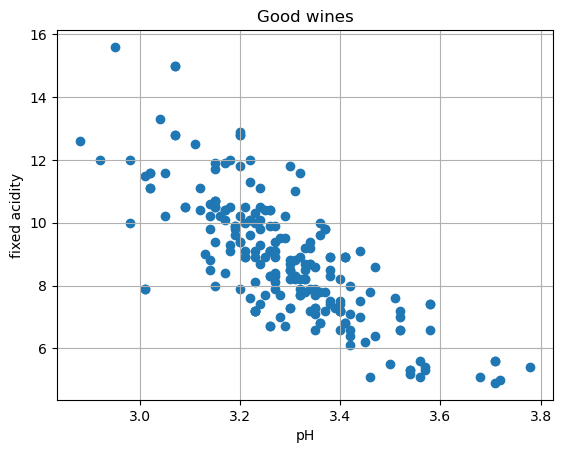

In [3]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 赤ワインデータをpandasのデータフレームに読み込む
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()
# 品質の良いものに絞る（"quality"の値が7以上）
df1 = df[df['quality'] > 6]
df1.head()
# 説明変数をpHの値に，目的変数を"fixed acidity"(不揮発酸濃度)の値にする
X = df1['pH'].values
Y = df1['fixed acidity'].values
# 赤ワインのpHと不揮発酸濃度の関係をグラフ（散布図）にする
plt.title('Good wines')
plt.scatter(X, Y)
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

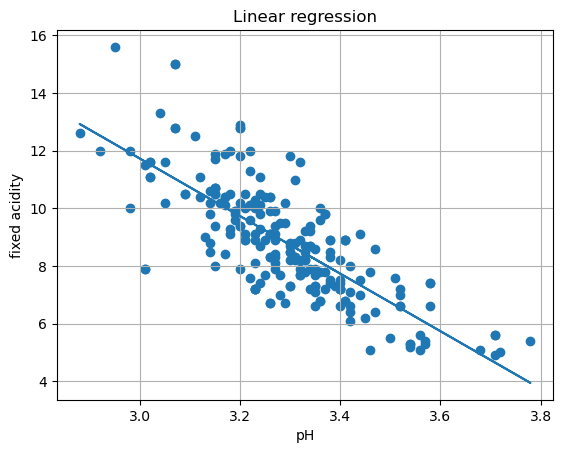

回帰係数=  [-9.985041]
切片=  41.685825856217654
決定係数=  0.5948141769596296


In [4]:
# scikit-learnを用いて線形単回帰分析を行う
clf = linear_model.LinearRegression()
X2 = [[x] for x in X]
clf.fit(X2, Y) # 予測モデルを作成

# 散布図
plt.scatter(X2, Y)

# 回帰直線
plt.title('Linear regression')
plt.plot(X2, clf.predict(X2))
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.grid()
plt.show()

print("回帰係数= ", clf.coef_)
print("切片= ", clf.intercept_)
print("決定係数= ", clf.score(X2, Y))

#### 例6-2：映画Rogue Oneのタイトル検索数（日本公開日の2016年12月16日から4週間分）のデータ（最も検索の多かった日を100とした相対数）
![image1.png](https://drive.google.com/uc?id=1-1vA22SfVsmvXVjABkE9Am_U9e2_Ti06)

この表をファイル"RogueOneSearchInterest28days.csv"として保存し，Dayの値を説明変数，Search Interest の値を目的変数として線形回帰分析を行う．

In [5]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 表をpandasのデータフレームに読み込む
dfex2 = pd.read_csv('RogueOneSearchInterest28days.csv', sep=',')
dfex2.head()

,Day,Search Interest
0,1,79
1,2,100
2,3,94
3,4,51
4,5,49


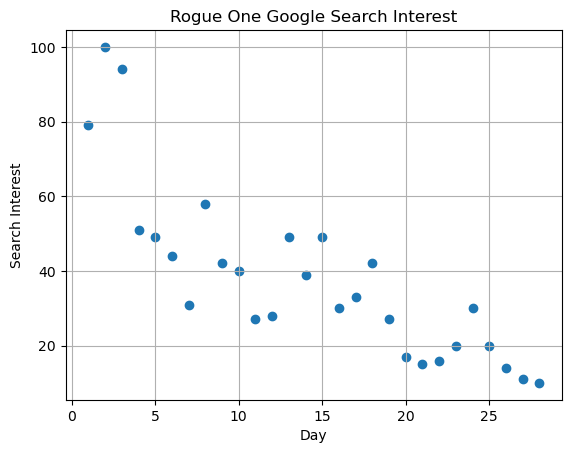

In [6]:
# 必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# 表をpandasのデータフレームに読み込む
dfex2 = pd.read_csv('RogueOneSearchInterest28days.csv', sep=',')
dfex2.head()
# 説明変数をDayの値に，目的変数をSearch Interestの値にする
X = dfex2['Day'].values
Y = dfex2['Search Interest'].values
# 経過日数と相対検索数の関係をグラフ（散布図）にする
plt.title('Rogue One Google Search Interest')
plt.scatter(X, Y)
plt.xlabel('Day')
plt.ylabel('Search Interest')
plt.grid()
plt.show()

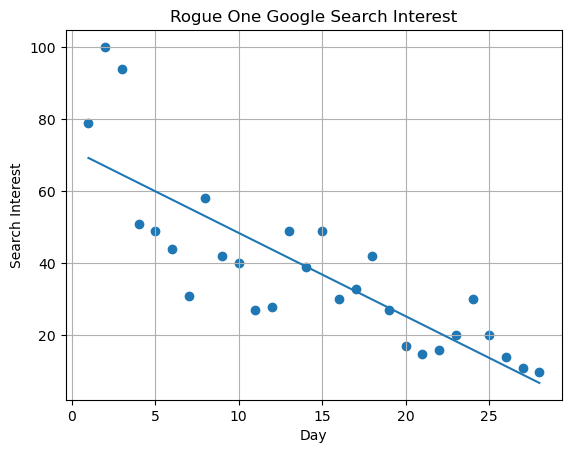

回帰係数=  [-2.31007115]
切片=  71.53174603174602
決定係数=  0.6770140607127098


In [7]:
# scikit-learnを用いて線形単回帰分析を行う
clf = linear_model.LinearRegression()
X2 = [[x] for x in X]
clf.fit(X2, Y) # 予測モデルを作成

# 散布図
plt.scatter(X2, Y)

# 回帰直線
plt.title('Rogue One Google Search Interest')
plt.plot(X2, clf.predict(X2))
plt.xlabel('Day')
plt.ylabel('Search Interest')
plt.grid()
plt.show()

print("回帰係数= ", clf.coef_)
print("切片= ", clf.intercept_)
print("決定係数= ", clf.score(X2, Y))

### 6.2.2 線形重回帰分析
- 複数の説明変数を持つ回帰分析を重回帰分析と呼ぶ．
- 以下のように複数の$X_i$（説明変数）や$a_i$（偏回帰係数）を持つ回帰式となる
$$
Y=a_1\times X_1+a_2\times X_2+ … +a_n\times X_n
$$

#### 例6-3：赤ワインのデータ(例6-1)
- 密度(density)と揮発酸（volatile acidity）とアルコール度数(alcohol)の関係を調べる
- x1に説明変数として密度(density)、x2に説明変数として揮発酸（volatile acidity）、yに目的変数としてアルコール度数(alcohol)として分析する

In [8]:
import pandas as pd

f = pd.read_csv('winequality-red.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
x = df[['density', 'volatile acidity']]
y = df[['alcohol']]
x1 = df[['density']]
x2 = df[['volatile acidity']]

print(x.shape)
print(y.shape)

(1599, 2)
(1599, 1)


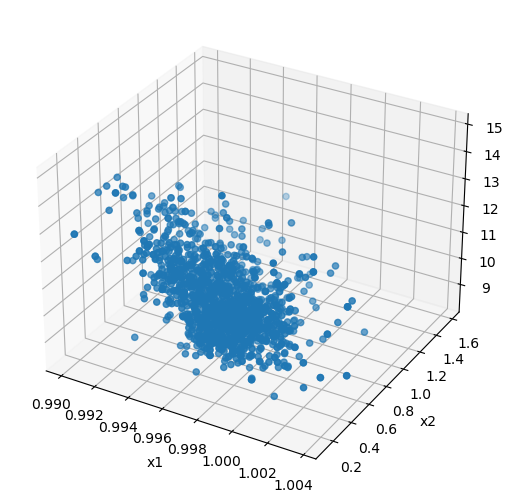

In [10]:
# 密度と揮発酸とアルコール度数の関係をグラフ（3D散布図）にする
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
ax=Axes3D(fig)
fig.add_axes(ax)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()

In [11]:
# scikit-learnを用いて重回帰分析を行う
from sklearn.linear_model import LinearRegression
import numpy as np

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

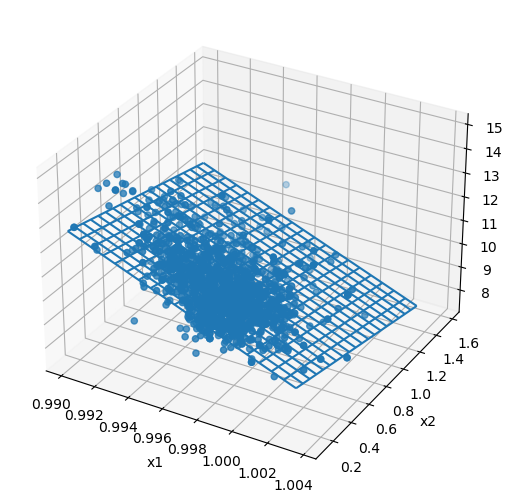

[[-277.78274856   -1.13941954]]
[287.90342428]
0.28283042699952965


In [12]:
# 分析結果をグラフにする
fig=plt.figure()
ax=Axes3D(fig)
fig.add_axes(ax)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model_lr.coef_[0][0] * mesh_x1 + model_lr.coef_[0][1] * mesh_x2 + model_lr.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

print(model_lr.coef_)
print(model_lr.intercept_)
print(model_lr.score(x, y))

#### 線形重回帰分析の注意事項
本講義では詳細の説明は省きますが，以下の項目について注意が必要となります．
- 多重共線性：２つの説明変数の間に強い相関関係があるときに起こることです．多重共線性が生じると，常識的に正の値になるはずの偏回帰係数が負の値になったり，負の値になると考えられる偏回帰係数が正の値になったりします．また，データの数を少し変えただけで偏回帰係数の値が大きく変動することもあり，回帰分析の結果が不安定になります．この問題を回避する方法の1つとして，事前に相関分析を行い，強い相関関係を持つ２つの説明変数のうちいずれかを除去するという方法があります．あるいは，以下の変数選択と呼ばれる統計的な方法で説明変数を自動的に選択することも可能です．
- 変数選択：以下に主な変数選択の方法を示します． 

|方法|仕組み|
|-|-|
|変数増加法|最初に，目的変数との関連性が最も高い説明変数を回帰式に入れる．その後，すでに回帰式に入っている説明変数との関係を考慮しながら，一定の基準に達するまで，目的変数との関連性が高い順に説明変数を入れていく．|
|変数減少法|最初に，すべての説明変数を回帰式に入れる．その後，他の説明変数との関係を考慮しながら，一定の基準に達するまで，目的変数との関連性が低い順に説明変数を除いていく．|
|変数増減法|増加法と減少法を組み合わせた方法，変数増加法と同じ基準で説明変数を1つずつ回帰式に入れつつ，変数減少法と同じ基準で削除すべき説明変数を除いていく．|

- 正規化：重回帰分析で、入力変数が複数になったことで重要なこととして、正規化の必要性が挙げられます。なぜ正規化が必要かというと、入力変数の単位（m, mm）や比べる対象（温度、密度）が異なり、そのままの数字を使うと、影響度合いをうまく評価できないからです。1mの変化と1mmの変化を同じ尺度で考えてはいけないのは、直感的にも分かると思います．これらの変数ごとの粒度を揃えるためのデータに対して行われる前処理が正規化(normalization)です。正規化の代表的な手法は以下2つです。
    - 標準化 (standardization)：平均、分散（標準偏差）を使ったもの（平均を0、分散を1にする）
    - Min-Maxスケーリング(min-max scaling)：最小値(min)、最大値(max)を使ったもの（全体を 0〜1にする）
    - 分野によっては「正規化=標準化」だったと定義が異なり紛らわしいですが、データを一定のルールに基づいて変形して、利用しやすくすることは全て正規化と呼ぶのが一般的なようです。
- 決定係数：実測値と回帰直線の誤差などに注目し，説明変数が目的変数をどのくらい説明しているかを表す指標．

#### 例6-4：標準化した値でScikit-learnを使った重回帰分析を行う

In [13]:
# scikit-learnのStandardScalerメソッドを使って，コマンド一発でいわゆる普通の分散を用いて標準化を行う
from sklearn import preprocessing

sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

print(xss_sk)
print(yss_sk)

[[ 0.55827446  0.96187667]
 [ 0.02826077  1.96744245]
 [ 0.13426351  1.29706527]
 ...
 [-0.53355375 -0.09955388]
 [-0.67665745  0.65462046]
 [-0.66605717 -1.21684919]]
[[-0.96024611]
 [-0.58477711]
 [-0.58477711]
 ...
 [ 0.54162988]
 [-0.20930812]
 [ 0.54162988]]


In [14]:
# StandardScalerを使用して正規化したxss_sk, yss_sk を用いて重回帰分析を行う
model_lr_std = LinearRegression()
model_lr_std.fit(xss_sk, yss_sk)

print(model_lr_std.coef_)
print(model_lr_std.intercept_)
print(model_lr_std.score(xss_sk, yss_sk))

[[-0.49196281 -0.19145194]]
[-1.69468871e-14]
0.28283042699952965


偏回帰係数の差が、2.5倍程度と正規化無し（例4-3）のときと比べて小さくなっています。正規化してから求めた偏回帰係数のことを、標準化偏回帰係数と呼び回帰係数と区別します。また入力が正規化されているので切片model_lr.intercept_は（ほぼ）0となっています。1.1769986e-14と完全に0になっていないのはScikit-learnの計算上の都合です。ほとんど問題にならないですが、気になる場合はLinearRegression()にfit_intercept=Falseのオプションをつけて計算すると完全に0になります。一方、scoreに関しては、正規化しても変わりません。  
ここで、標準化偏回帰係数を用いて単純にxss_skを使ってyを計算（予測）すると、普通の回帰係数を用いて計算した結果と異なってしまい問題になります。  
この場合、正規化する前のモデルで逆変換して戻してあげる必要があります。scikit-learnには逆変換を行うinverse_transformがあるので、これを用いると簡単に変換できます。

In [15]:
sscaler.inverse_transform(model_lr_std.predict(xss_sk))

array([[ 9.93420409],
       [10.00689132],
       [10.08806511],
       ...,
       [10.72292626],
       [10.64410597],
       [11.02025586]])

#### 例7-5：min-maxスケーリングの値でScikit-learnを使った重回帰分析を行う

In [16]:
# scikit-learnを使ってmin-maxスケーリングを行う
mscaler = preprocessing.MinMaxScaler()
mscaler.fit(x)
xms = mscaler.transform(x)
mscaler.fit(y)
yms = mscaler.transform(y)

print(xms)
print(yms)

[[0.56754772 0.39726027]
 [0.49412628 0.52054795]
 [0.50881057 0.43835616]
 ...
 [0.41629956 0.26712329]
 [0.39647577 0.35958904]
 [0.3979442  0.13013699]]
[[0.15384615]
 [0.21538462]
 [0.21538462]
 ...
 [0.4       ]
 [0.27692308]
 [0.4       ]]


In [17]:
# min-maxスケーリングした値で重回帰分析を行う
model_lr_norm = LinearRegression()
model_lr_norm.fit(xms, yms)

print(model_lr_norm.coef_)
print(model_lr_norm.intercept_)
print(model_lr_norm.score(xms, yms))

[[-0.5820617  -0.25593116]]
[0.66805047]
0.2828304269995294


In [18]:
# 標準化の場合と同様に，yの値を予測するときには、逆変換をする必要があります
# min-maxスケーリングでも、標準化のときと同様inverse_transformを使って変換できます
mscaler.inverse_transform(model_lr_norm.predict(xms))

array([[ 9.93420409],
       [10.00689132],
       [10.08806511],
       ...,
       [10.72292626],
       [10.64410597],
       [11.02025586]])

## 6.3 教師あり学習（分類）
### 6.3.1 線形判別分析
- 線形判別分析とは，説明変数の頻度パターンを解析し，あらかじめ設定された複数のカテゴリー（群）に大量のデータを自動分類するための手法です．
- 自動分類に用いる判別式（線形判別関数）は，説明変数が2つの場合は以下のようになります．この式は線形重回帰分析の式と本質的には同じです．この式から得られる値（判定得点）に基づいて分類が行われます．
$$
Y=a_1\times X_1+a_2\times X_2+c
$$
#### 例6-6：ワインのデータによる線形判別分析

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# データセットの読み込みとサマリー表示
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())
print()


   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

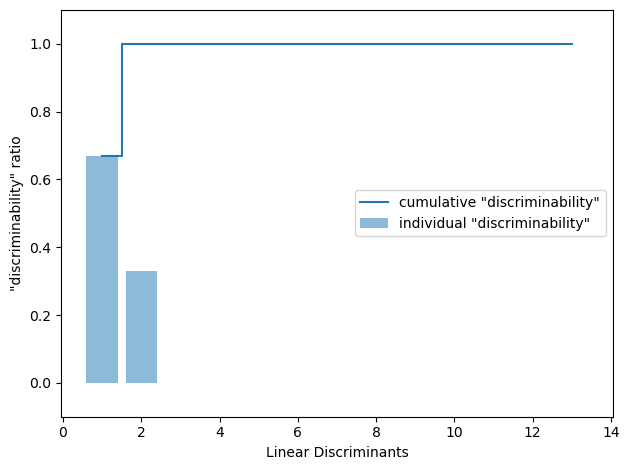

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


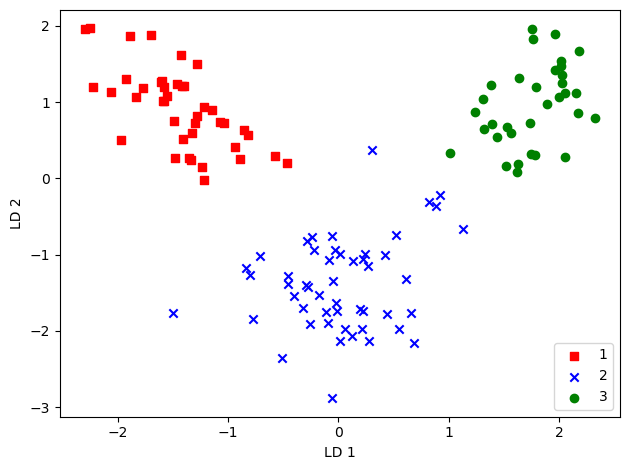

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# データセットの読み込みとサマリー表示
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())
print()

# データセットのトレーニングデータとテストデータへの分割(7:3)
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y, random_state=0)  
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print()

# Xデータの標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 平均ベクトルの計算
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

# クラス内変動の計算
d = 13 
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))
print('Class label distribution: %s' % np.bincount(y_train)[1:])

# スケーリング
d = 13  
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

# クラス間変動の計算
mean_overall = np.mean(X_train_std, axis=0)
d = 13  
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  
    mean_overall = mean_overall.reshape(d, 1)  
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

# 固有値を降順に表示
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('\nEigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

# 固有値の寄与度をパレート図に表示
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 射影行列wを設定
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

# トレインデータを射影行列wで変換
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

C:\Users\murakawa\AppData\Local\Temp\ipykernel_12056\76521.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
C:\Users\murakawa\AppData\Local\Temp\ipykernel_12056\76521.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


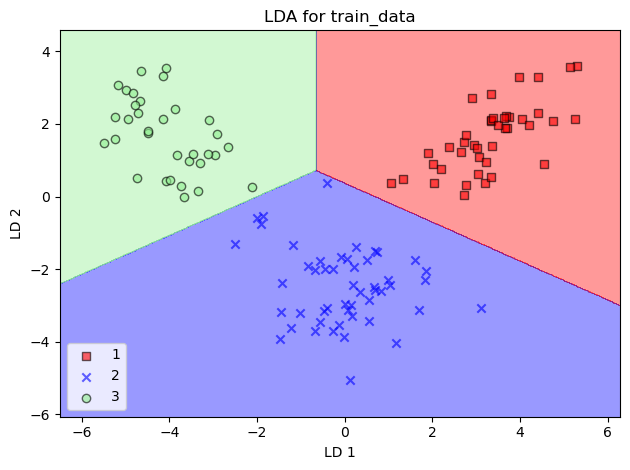

C:\Users\murakawa\AppData\Local\Temp\ipykernel_12056\76521.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
C:\Users\murakawa\AppData\Local\Temp\ipykernel_12056\76521.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


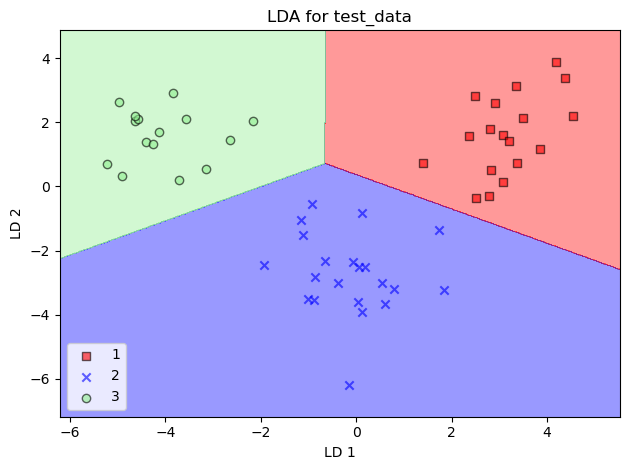

In [21]:
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

# 決定領域表示関数
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# sklearnによる線形判別分析
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
lr = LogisticRegression(solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

# トレインデータによる決定領域表示
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.title('LDA for train_data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# テストデータによる決定領域表示
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.title('LDA for test_data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 6.3.2 決定木
- 説明変数の値に基づいてデータを段階的に分割していくことで，判別モデルを構築します．
- 以下の「決定木のイメージ」の図で説明します．
    - 左側の図ような散布図を考える．〇△□という3つのグループに属するデータが分布している．
    - この３つのグループを分ける場合，Yの値が25以上か25未満かに注目すると，〇とそれ以外の2グループに分けることができる（分割線１）
    - 次に，Xの値が30以上か30未満かに注目すると，△と□を区別することが可能（分割線２）
    - この2段階の分割を木構造で表現したものが右側の図です．

![image1.png](https://drive.google.com/uc?id=1-GjYLDMij64w5SM9LEW8mH_sO0tELKA7)

#### 例6-7：タイタニック号の乗船客のデータ

In [22]:
import pandas as pd
# データをpandasのデータフレームに読み込む
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='count'>

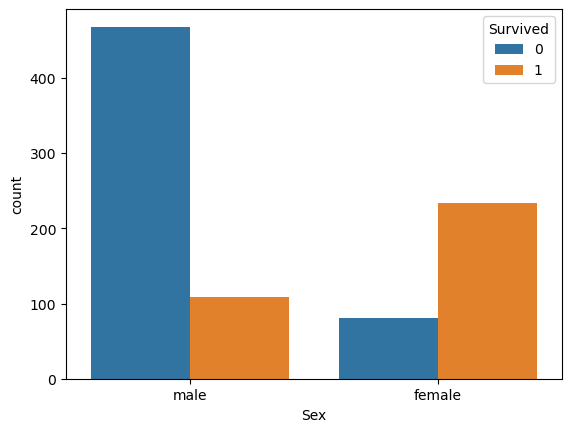

In [23]:
# 生存者の比較
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='Sex',hue='Survived',data=df)

In [24]:
# データの前処理
from sklearn.model_selection import train_test_split
#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
# "Servived"の情報を目的変数(train_y)，その他の情報を説明変数(train_X)に設定
train_X = df.drop('Survived', axis=1)
train_y = df.Survived
# 訓練用データ(train_X, train_y)とテスト（検証）用データ(test_X, test_y)（３割）に分割する
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

In [25]:
# scikit-learnの中のライブラリtreeを使って決定木を作成
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [26]:
# 検証データを使って精度を見る
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.7947761194029851

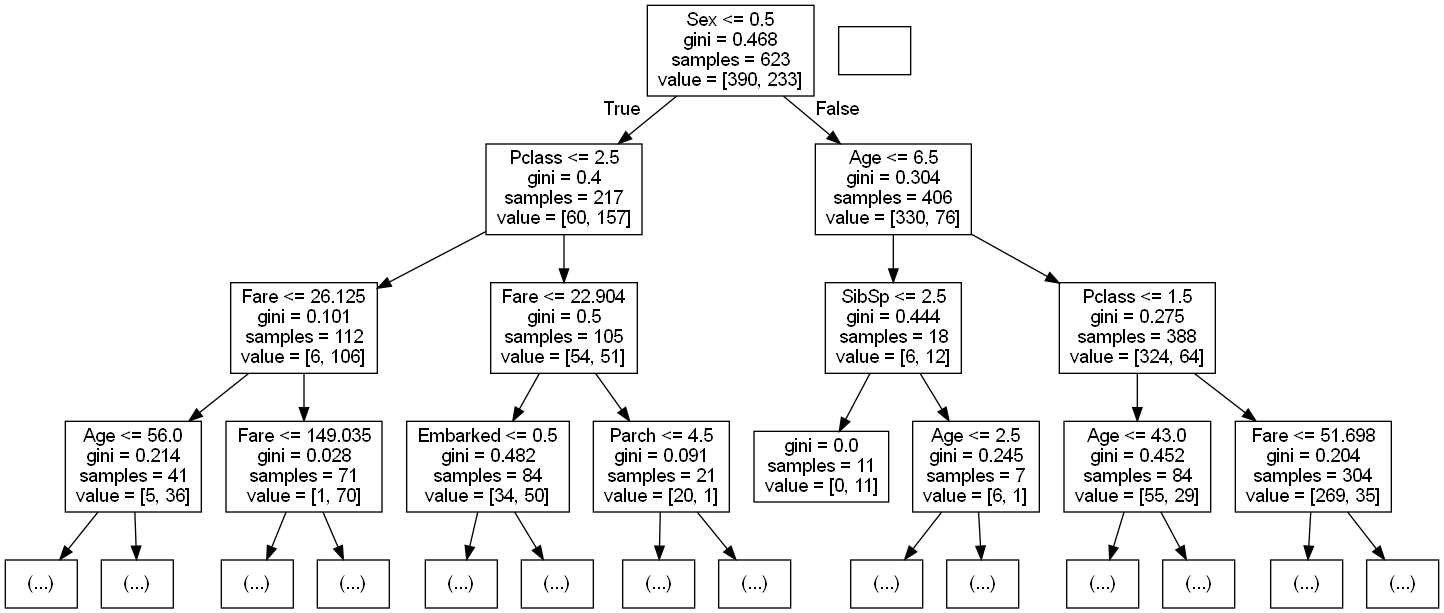

In [27]:
# 可視化
# 必要なライブラリをanaconda promptでインストール
# conda install -c conda-forge pydotplus
# pip install graphviz
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("ex4-7_taitanic_graph.pdf")
Image(graph.create_png())

#### 例6-8 ：決定木によるスパムメール判定実験

In [28]:
import pandas as pd
df_spam = pd.read_csv('spam.csv')
df_spam.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [29]:
# データの前処理
from sklearn.model_selection import train_test_split

#カテゴリ変数の変換
df_spam['type'] = df_spam['type'].apply(lambda x: 1 if x == 'nonspam' else 0)

# "type"の情報を目的変数(train_y_spam)，その他の情報を説明変数(train_X_spam)に設定
train_X_spam = df_spam.drop('type', axis=1)
train_y_spam = df_spam.type
# 訓練用データ(train_X_spam, train_y_spam)とテスト（検証）用データ(test_X_spam, test_y_spam)（３割）に分割する
(train_X_spam, test_X_spam ,train_y_spam, test_y_spam) = train_test_split(train_X_spam, train_y_spam, test_size = 0.3, random_state = 666)

In [30]:
# scikit-learnの中のライブラリtreeを使って決定木を作成
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X_spam, train_y_spam)
pred = clf.predict(test_X_spam)

In [31]:
# 検証データを使って精度を見る
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X_spam)
fpr, tpr, thresholds = roc_curve(test_y_spam, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y_spam)

0.8921071687183201

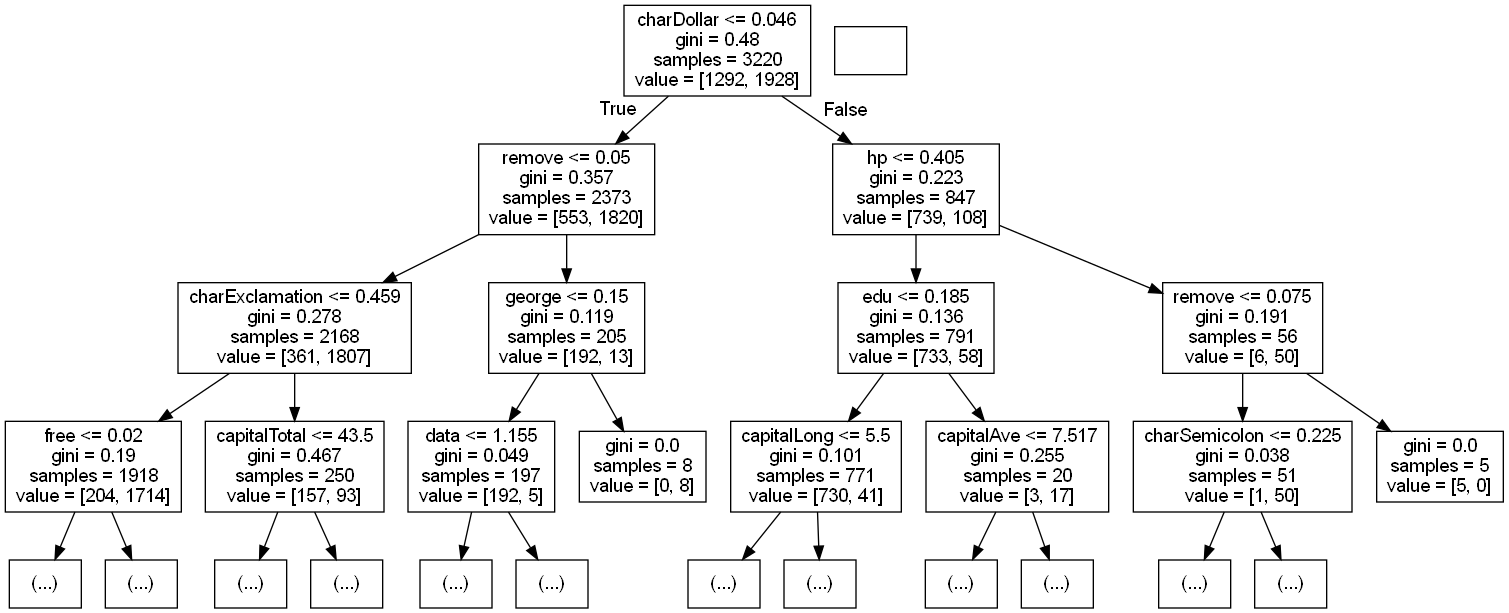

In [32]:
# 可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
#from sklearn.externals.six import StringIO
from six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=train_X_spam.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("ex4-8_spam_graph.pdf")
Image(graph.create_png())

### 6.3.3 ランダムフォレスト
- 比較的高い分類精度が得られる手法として知られている．
- ランダムフォレストとは，大量の決定木を生成し，それらすべての決定木から得られる結果の多数決によって，最終的な分類を行う手法
- 多数の判別モデルを１つに統合して，よりよいモデルを構築する手法をアンサンブル学習という
- ランダムフォレストでは，多数の判別モデルを生成する際に，一部の説明変数のみを無作為抽出して用いる．したがって，分析の前に変数選択をする必要はない

#### 例6-9：タイタニック号の乗船客データによる生存のための重要要素

In [33]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8208955223880597

ランダムフォレストでは、どの変数が重要であったかをfeature_importancesというメソッドを使うことで出すことができます。
それを図にプロットするコードが以下になります。

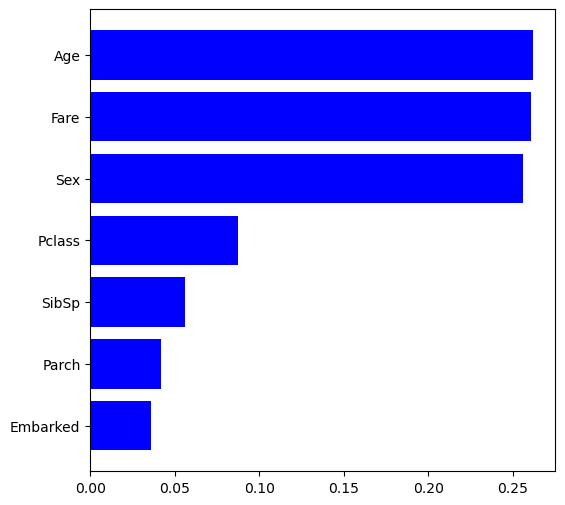

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

features = train_X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

#### 例6-10：ランダムフォレストによるスパムメール判定実験（どの項目がスパムメールと判定するのに重要か）

In [35]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X_spam, train_y_spam)
pred = clf.predict(test_X_spam)
fpr, tpr, thresholds = roc_curve(test_y_spam, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y_spam)

0.9536567704561911

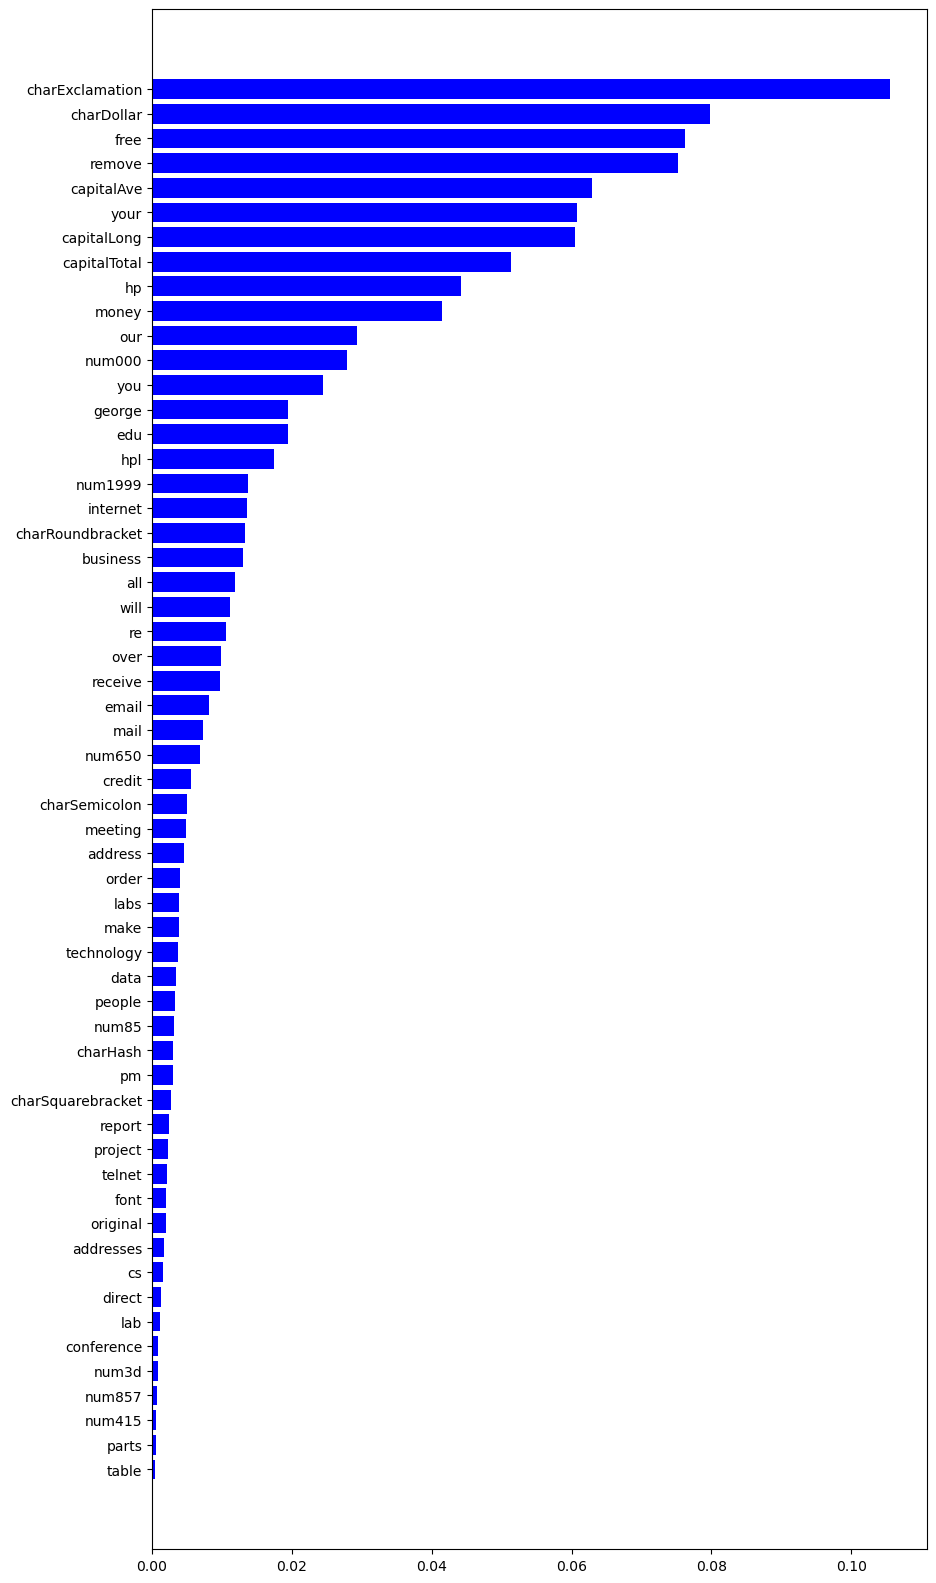

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

features = train_X_spam.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,20))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

## 6.4 教師なし学習
ここでは，教師なしの学習の分類について説明します．具体的には，階層型クラスター分析と対応分析によるテキストのグループ化を扱います．
### 6.4.1 クラスター分析
クラスター分析には大きく分けて，階層型クラスター分析と非階層型クラスター分析の２種類があります．そのうち，ここでは，階層型クラスター分析について説明します．  
階層型クラスター分析は，個々のデータの非類似度を「距離」として表現し，距離の近いデータ同士をまとめてクラスター（グループ）を作る手法です．具体的には，それぞれのデータが全くまとめられていない状態から始めて，少数のクラスターを作ります．このように距離の近いデータ同士をまとめていく手法をクラスタリングと呼びます．  
階層型クラスター分析では，どのような距離でデータ間の非類似度を測るか（データ間の距離の計算方法：以下の図「ユークリッド距離とマンハッタン距離のイメージ」を参照），どのようにクラスターを作るか（クラスター間の距離の計算方法：以下の図「最短距離法と最長距離法と群平均法のイメージ」参照），を指定する必要があります．SciPyライブラリのcluster.hierarchyモジュールのlinkageクラスを使うと，クラスタリングが実現できます．このとき，データ間の距離の計算方法とクラスター間の距離の計算方法を指定することができます．

![image1.png](https://drive.google.com/uc?id=1-4jvII-4VQrwD2XMnV4MuUqMRTo4vD_R)

![image1.png](https://drive.google.com/uc?id=1-F4ORCMKHFT4E0F6GuOwuVx39jJ8sUU2)

#### データ間の距離の定義
- ユークリッド距離
- ミンコフスキー距離：$d(u,v)=||u-v||_p \ \ \ \ \ \    (p\geq 1)$  
- コサイン類似度：$d(u,v)=1-\frac{u\cdot v}{||u||_2||v||_2}$  
- 自己相関関数：$d(u,v)=1-\frac{(u-\overline{u})\cdot(v-\overline{v})}{||(u-\overline{u})||_2||(v-\overline{v})||_2}$ 
- Jaccard係数：$d(u,v)=1-\frac{u\cap v}{u\cup v}$  
- canberra距離：$d(u,v)=\sum_{i}\frac{|u_i-v_i|}{|u_i|+|v_i|}$

#### クラスタ間における距離の定義
- 最短距離法：$d(u,v)=min(dist(u[i],v[j]))$
- 最長距離法：$d(u,v)=max(dist(u[i],v[j]))$
- 群平均法：$d(u,v)=\sum_{i,j}\frac{dist(u[i],v[j])}{|u|\cdot|v|}$
- 重心法：クラスタ$s$の重心を$c_s$，クラスタ$t$の重心を$c_t$とすると，その間の距離は，$d(s,t)=||c_s - c_t||_2$
- ウォード(ward)法：クラスタ$P$と$Q$間の距離は，$d(P,Q)=E(P\cup Q)-E(P)-E(Q)$ただし，$E(A)$は，クラスタ$A$のすべての点からクラスタ$A$の重心までの距離の２乗の総和．

#### 例6-11：都道府県別アルコール類の消費量データのクラスター分析

In [37]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request

# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sake_dataJ.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'sake_dataJ.txt')

df11 = pd.read_csv('sake_dataJ.txt', sep='\t', index_col=0) # データの読み込み
df11.head()

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,46476000,50642000,315300000,10488000,9749000
Aomori,17273000,11503000,83164000,1774000,3122000
Iwate,17120000,10220000,67803000,1458000,1870000
Miyagi,27859000,11768000,109850000,2824000,5049000
Akita,24153000,6240000,67894000,1242000,2099000


In [38]:
# 行列の正規化
dfs11 = df11.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)
dfs11.head()

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,0.811237,2.147580,1.057634,1.029017,1.207049
Aomori,-0.437580,-0.210625,-0.389028,-0.298893,-0.126779
Iwate,-0.444123,-0.287929,-0.484757,-0.347047,-0.378772
Miyagi,0.015112,-0.194659,-0.222722,-0.138885,0.261072
Akita,-0.143369,-0.527732,-0.484190,-0.379963,-0.332681


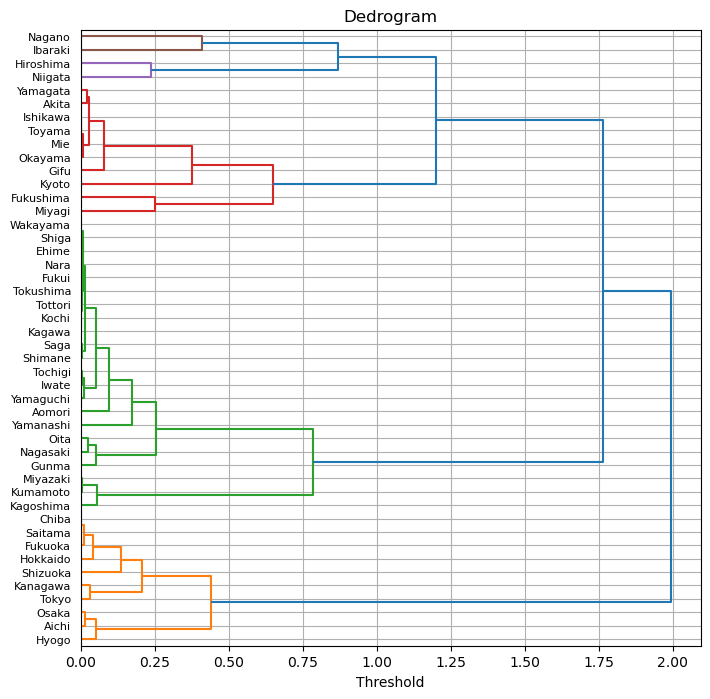

In [39]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# Metricからどれかひとつ、Methodからどれかひとつ選んで実行する。
# エラーが起こったり、あるいは「計算はできたけど、なんかこの結果はしっくり来ないな
#（解釈しづらいな）」と思ったら、別の方法を試す。
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs11.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  metric = 'cosine', 
                  #metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  method= 'complete')
                  #method='weighted')
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df11.index), color_threshold=0.8)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

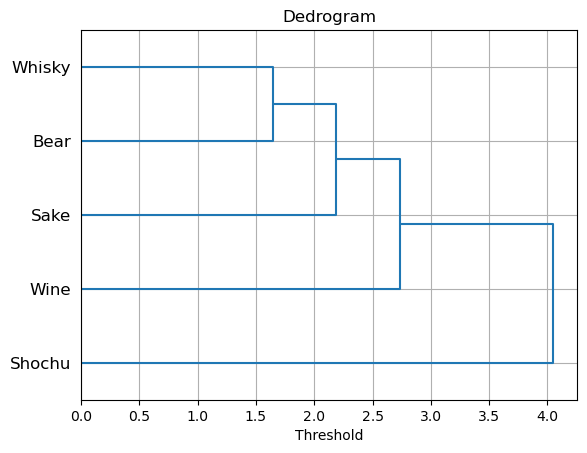

In [40]:
# 行と列を入れ替えてクラスタリング
# 行列の転置を行えば、行と列を入れ替えたクラスタリングが行えます。

from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs11.T.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  #method= 'complete')
                  method='weighted')
#plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df11.columns), color_threshold=0.05)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

#### 例6-12：6人の作家によって書かれた12種類のテキストからアルファベット26文字の頻度を集計したデータのクラスター分析

In [41]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

df12 = pd.read_csv('author.csv', index_col=0) # データの読み込み
df12.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
work,,,,,,,,,,,,,,,,,,,,,
three daughters (buck),550,116,147,374,1015,131,131,493,442,2,...,4,409,467,632,174,66,155,5,150,3
drifters (michener),515,109,172,311,827,167,136,376,432,8,...,4,368,387,632,195,60,156,14,137,5
lost world (clark),590,112,181,265,940,137,119,419,514,6,...,8,395,464,670,224,113,146,13,162,10
east wind (buck),557,129,128,343,996,158,129,571,555,4,...,3,413,533,632,181,68,187,10,184,4
farewell to arms (hemingway),589,72,129,339,866,108,159,449,472,7,...,0,416,314,691,197,64,225,1,155,2


In [42]:
# 行列の正規化
dfs12 = df12.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)
dfs12.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
work,,,,,,,,,,,,,,,,,,,,,
three daughters (buck),-0.249950,0.337948,-0.315339,0.862709,1.494152,-0.187633,-0.364584,0.517340,-0.879046,-1.537542,...,-0.232210,0.975595,0.673637,-0.601956,-1.434777,-0.050484,-0.603898,-0.595480,-0.054373,-0.505823
drifters (michener),-1.578801,-0.016897,0.346212,-0.151611,-0.679160,1.313433,-0.152205,-0.980279,-1.067750,1.098244,...,-0.232210,0.129047,-0.546536,-0.601956,-0.533122,-0.353390,-0.579902,1.142678,-0.319440,-0.114218
lost world (clark),1.268736,0.135179,0.584370,-0.892226,0.627139,0.062544,-0.874293,-0.429872,0.479622,0.219649,...,1.161051,0.686529,0.627881,0.798512,0.712022,2.322274,-0.819862,0.949549,0.190305,0.864795
east wind (buck),0.015820,0.996945,-0.818118,0.363599,1.274508,0.938167,-0.449535,1.515753,1.253309,-0.658947,...,-0.580525,1.058185,1.680281,-0.601956,-1.134225,0.050484,0.163972,0.370163,0.638880,-0.310021
farewell to arms (hemingway),1.230768,-1.892507,-0.791656,0.299198,-0.228313,-1.146648,0.824738,-0.045867,-0.312934,0.658947,...,-1.625471,1.120127,-1.659944,1.572455,-0.447250,-0.151453,1.075818,-1.367995,0.047576,-0.701626


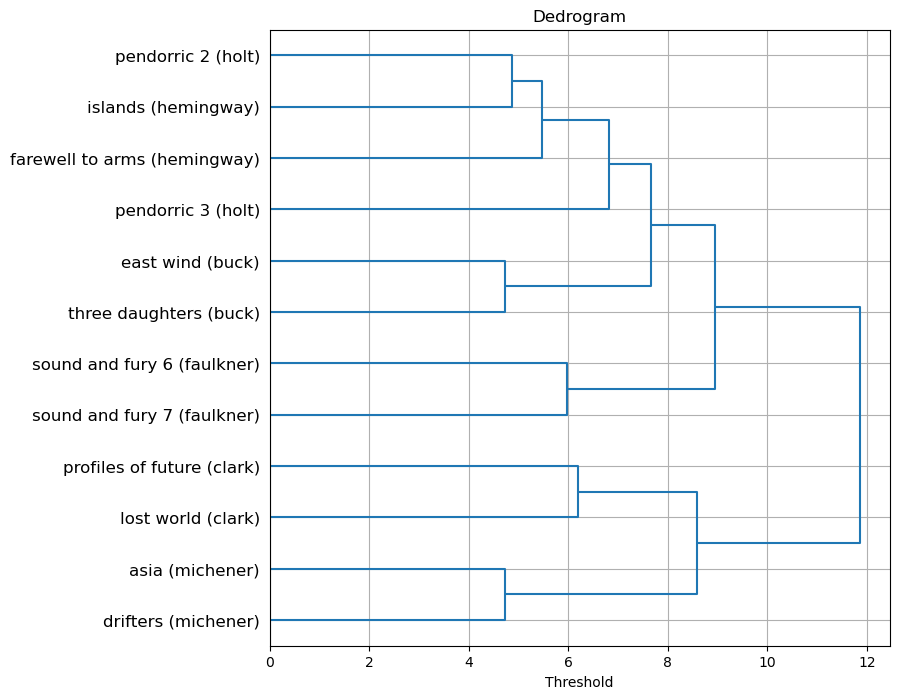

In [43]:
# metric は色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
# method も色々あるので、ケースバイケースでどれかひとつ好きなものを選ぶ。
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs12.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
                  method='ward')
plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df12.index), color_threshold=0.8)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

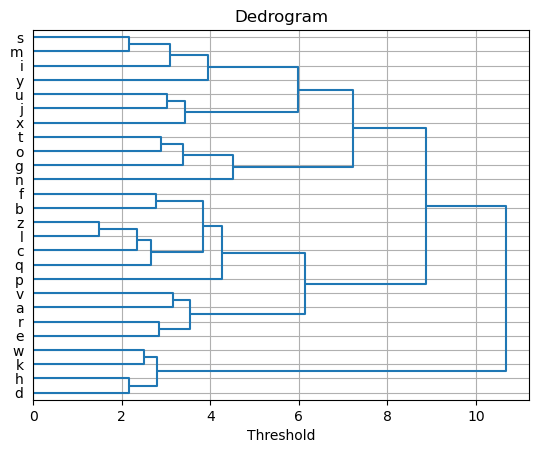

In [44]:
# 行と列を入れ替えてクラスタリング
# 行列の転置を行えば、行と列を入れ替えたクラスタリングが行えます。

from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(dfs12.T.iloc[:, :], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  #method= 'single')
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
                  method='ward')
#plt.figure(figsize=(8, 8))
dendrogram(result1, orientation='right', labels=list(df12.columns), color_threshold=0.05)
plt.title("Dedrogram")
plt.xlabel("Threshold")
plt.grid()
plt.show()

### 6.4.2 対応分析
個々のテキストと変数の関係を知りたい場合には，対応分析（コレスポンデンス分析）と呼ばれる手法を用いることが多い．対応分析は，クロス集計表に含まれる複雑な情報を少数の成分（次元）に圧縮し，それらの成分の関係を２次元の散布図などでわかりやすく可視化するための手法です．データの構造を可視化することでテキスト間の関係や変数間の関係を直観的に把握することが可能になる．  
対応分析の原理は，クロス集計表における行データと列データの関連の強さを測り，それを強調して表現することです．関連の強さを強調するとは，統計的には行データと列データの相関を最大化することを意味する．例えば，０と１の値を取るクロス集計表の行と列を並べ替えて，１ができるだけ対角線上に集中して並ぶようにして，行データと列データが互いに強く関連しあう視点を作ります．
#### 例6-13：ワインの評価データ（専門家３名が，６種類のワインの味の特徴をコメントしたもの）
6種類のワインの味の特徴は，果実感(fruity)，オーク匂（oak_type)，バニラ匂(vanillin)，香ばしさ(woody)，コーヒー匂(coffee)．  

In [45]:
!pip install --user mca

In [46]:
# コレスポンデンス分析のライブラリ
# mcaライブラリをインストールします．
# インストールは，以下のコマンドをjupyter notebookで実行してください．

#!pip install --user mca

import mca

import pandas as pd

# データを読み込む
df5 = pd.read_table('burgundies.csv', sep=',', index_col=0, header=0, skiprows=1) # データの読み込み
df5.head()

,oak_type,fruity_1,fruity_1.1,woody_1,woody_1.1,woody_1.2,coffee,coffee.1,fruity_2,fruity_2.1,...,vanillin.1,vanillin.2,woody_2,woody_2.1,fruity_3,fruity_3.1,buttery,buttery.1,woody_3,woody_3.1
Wine,,,,,,,,,,,,,,,,,,,,,
W1,1,1,0,0,0,1,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
W2,2,0,1,0,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,1,0
W3,2,0,1,1,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,1,0
W4,2,0,1,1,0,0,1,0,0,1,...,0,0,1,0,1,0,1,0,1,0
W5,1,1,0,0,0,1,0,1,1,0,...,0,1,0,1,1,0,0,1,0,1


In [47]:
# コレスポンデンス分析（df5は分析対象のpandasデータフレーム
mca_ben5 = mca.MCA(df5)

,0,1
W1,-0.801140,-0.107817
W2,0.610752,0.176994
W3,0.783806,-0.094190
W4,0.733079,-0.086178
W5,-0.856478,-0.099078
W6,-0.663439,0.210576


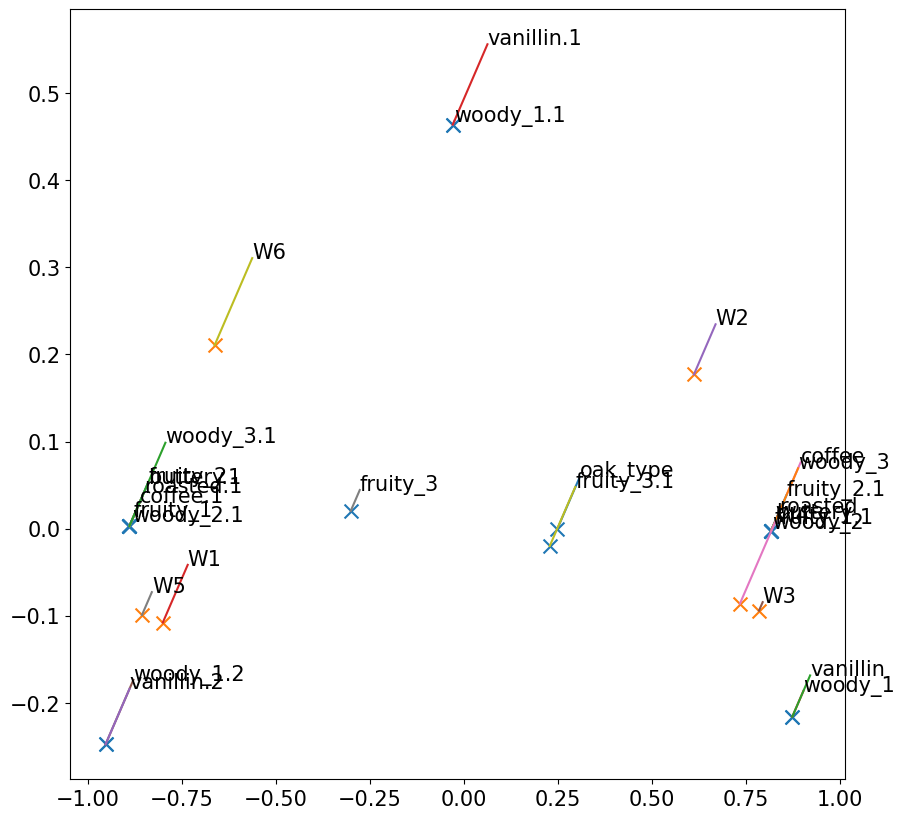

In [48]:
# 表頭の座標を書き出す
result_row5 = pd.DataFrame(mca_ben5.fs_r(N=2))
result_row5.index = list(df5.index)

# 表側の座標を書き出す
result_col5 = pd.DataFrame(mca_ben5.fs_c(N=2))
result_col5.index = list(df5.columns)

# 作図用ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd

# 図の設定（任意）
plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 15

# 表頭をプロット
plt.scatter(result_col5[0], result_col5[1], s=100, marker="x")
# ラベル付け
cnt = 0
for label in list(result_col5.index):
    r = rnd.random() * 0.1
    plt.text(result_col5.iloc[cnt, 0]+r, result_col5.iloc[cnt, 1]+r, label)
    plt.plot([result_col5.iloc[cnt, 0]+r, result_col5.iloc[cnt, 0]], [result_col5.iloc[cnt, 1]+r, result_col5.iloc[cnt, 1]])
    cnt += 1

# スコア確認
result_col5

# 表側をプロット
plt.scatter(result_row5[0], result_row5[1], s=100, marker="x")
# ラベル付け
cnt = 0
for label in list(result_row5.index):
    r = rnd.random() * 0.1
    plt.text(result_row5.iloc[cnt, 0]+r, result_row5.iloc[cnt, 1]+r, label)
    plt.plot([result_row5.iloc[cnt, 0]+r, result_row5.iloc[cnt, 0]], [result_row5.iloc[cnt, 1]+r, result_row5.iloc[cnt, 1]])
    cnt += 1

# スコア確認
result_row5

#### 例6-14：6人の作家によって書かれた12種類のテキストからアルファベット26文字の頻度を集計したデータの対応分析
例7-12のデータで対応分析を行ってが，pythonのmcaライブラリーでは，うまく行かない．  
対応分析は，pythonではなく，Rの例を示します．これをRStudioで実行してみてください．  
Anaconda3をインストールしてれば，Anaconda Navigatorからインストールと起動が可能．

以下をRStudioのConsole上で実行する．  
追加のパッケージ("ca")もConsole上で以下のコマンドでインストールする．

そして，以下の手順で実行
- 始めにライブラリ(ca)を読み込む．＞library(ca)
- データの読み込み（ライブラリに付属している）　＞data(author)
- 読み込んだデータのはじめ５行のみ表示　　＞head(author, 5)
- 対応分析を実行　　　　　　＞ca.result <- ca(author)
- 結果の可視化　　　　　　　＞plot(ca.result)
- 右のPlotsに結果が表示される


![image1.png](https://drive.google.com/uc?id=1-UOvMng06HjWNn-tpH5xJdt64uxibd9V)